In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from pprint import pprint
import openweathermapy as ow
import time

# Import API key
from Dans_api import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
Output_file = "City_Weather_Data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
City_list = []
city_count = 0

# Create a (big!) set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in City_list:
        City_list.append(city)
        city_count += 1
    #Get 550 cities
    if city_count == 550:
        break
        
# Print the city count to confirm sufficient count
print(len(City_list), "cities in the list")

550 cities in the list


In [3]:
#Define lists for upcoming data frame
Temp_list = []
Lat_list = []
Humid_list = []
Cloud_list = []
Wind_list = []
city_ct = 0

#Build URL to retrieve city weather data
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

# Build query URL
for city in City_list:
    query_url = url + "appid=" + api_key + "&q=" + city
    
    #Ensure the URL works
    try:
        weather_response = requests.get(query_url)
        weather_json= weather_response.json()
        
        #Ensure the JSON returns a temperature
        try:
            tem = "%0.0f" %(weather_json["main"]["temp_max"])
            tem = int(tem)
        #If no temp, set to null
        except:
            tem = None
        
        #Ensure the JSON returns a latitude
        try:
            Lat = weather_json["coord"]["lat"]
        #If no latitude, set to null
        except:
            Lat = None
        
        #Ensure the JSON returns a humidity level
        try:
            Humidity = weather_json["main"]["humidity"]
        #If no humidity, set to null
        except:
            Humidity = None

        #Ensure the JSON returns a wind speed
        try:
            Wind = weather_json["wind"]["speed"]
        #If no wind, set to null
        except:
            Wind = None
        
        #Ensure the JSON returns a cloud cover
        try:
            Clouds = weather_json["clouds"]["all"]
        #If no cloud cover, set to null
        except:
            Clouds = None
        
        #Add the returned JSON values to the lists for upcoming data frame
        Temp_list.append(tem)
        Lat_list.append(Lat)
        Humid_list.append(Humidity)
        Cloud_list.append(Clouds)
        Wind_list.append(Wind)
        city_ct += 1
        
        #Display returned JSON data for the city
        print(f"{city_ct}: Weather in {city} is {tem} degrees, {Lat} deg. latitude, {Humidity}% humidity, {Clouds}% cloud cover, and {Wind}mph wind.")
    
    #If the URL doesn't work...
    except:
        print(f"Problems with {city}!")

#Print confirmation of how many cities were returned
print("")
print("Reported weather for", city_ct, " cities!")

1: Weather in khanapur is 70 degrees, 15.64 deg. latitude, 43% humidity, 0% cloud cover, and 3.36mph wind.
2: Weather in mazatlan is 84 degrees, 23.22 deg. latitude, 25% humidity, 5% cloud cover, and 11.41mph wind.
3: Weather in qaanaaq is -22 degrees, 77.48 deg. latitude, 89% humidity, 20% cloud cover, and 7.43mph wind.
4: Weather in korla is None degrees, None deg. latitude, None% humidity, None% cloud cover, and Nonemph wind.
5: Weather in puerto ayora is 81 degrees, -0.74 deg. latitude, 83% humidity, 0% cloud cover, and 10.29mph wind.
6: Weather in rikitea is 79 degrees, -23.12 deg. latitude, 98% humidity, 0% cloud cover, and 19.06mph wind.
7: Weather in bandar-e torkaman is None degrees, None deg. latitude, None% humidity, None% cloud cover, and Nonemph wind.
8: Weather in barentsburg is None degrees, None deg. latitude, None% humidity, None% cloud cover, and Nonemph wind.
9: Weather in valdosta is 62 degrees, 30.83 deg. latitude, 41% humidity, 1% cloud cover, and 4.7mph wind.
10:

76: Weather in severo-kurilsk is 25 degrees, 50.68 deg. latitude, 100% humidity, 48% cloud cover, and 10.56mph wind.
77: Weather in samusu is None degrees, None deg. latitude, None% humidity, None% cloud cover, and Nonemph wind.
78: Weather in gondanglegi is 75 degrees, -7.75 deg. latitude, 98% humidity, 88% cloud cover, and 2.95mph wind.
79: Weather in mount isa is 90 degrees, -20.73 deg. latitude, 40% humidity, 0% cloud cover, and 11.41mph wind.
80: Weather in dubbo is 81 degrees, -32.25 deg. latitude, 51% humidity, 8% cloud cover, and 9.17mph wind.
81: Weather in avarua is 86 degrees, -21.21 deg. latitude, 79% humidity, 0% cloud cover, and 9.17mph wind.
82: Weather in hilo is 76 degrees, 19.71 deg. latitude, 73% humidity, 90% cloud cover, and 15.26mph wind.
83: Weather in arraial do cabo is 77 degrees, -22.97 deg. latitude, 97% humidity, 92% cloud cover, and 16.26mph wind.
84: Weather in codrington is 83 degrees, -28.95 deg. latitude, 69% humidity, 75% cloud cover, and 3.36mph wind.

151: Weather in rianxo is 52 degrees, 42.65 deg. latitude, 81% humidity, 0% cloud cover, and 4.7mph wind.
152: Weather in dolores is 52 degrees, -36.31 deg. latitude, 84% humidity, 32% cloud cover, and 6.42mph wind.
153: Weather in egvekinot is -3 degrees, 66.32 deg. latitude, 72% humidity, 12% cloud cover, and 3.4mph wind.
154: Weather in sentyabrskiy is None degrees, None deg. latitude, None% humidity, None% cloud cover, and Nonemph wind.
155: Weather in kodiak is 54 degrees, 39.95 deg. latitude, 18% humidity, 1% cloud cover, and 5.82mph wind.
156: Weather in guerrero negro is 65 degrees, 27.97 deg. latitude, 58% humidity, 68% cloud cover, and 17.27mph wind.
157: Weather in vestmannaeyjar is 38 degrees, 63.44 deg. latitude, 97% humidity, 76% cloud cover, and 17.94mph wind.
158: Weather in georgetown is 81 degrees, 6.8 deg. latitude, 78% humidity, 20% cloud cover, and 11.41mph wind.
159: Weather in torbay is 30 degrees, 47.66 deg. latitude, 63% humidity, 5% cloud cover, and 14.99mph w

224: Weather in malwan is None degrees, None deg. latitude, None% humidity, None% cloud cover, and Nonemph wind.
225: Weather in tazovskiy is 24 degrees, 67.47 deg. latitude, 95% humidity, 88% cloud cover, and 6.64mph wind.
226: Weather in limoncito is 66 degrees, -18.03 deg. latitude, 93% humidity, 90% cloud cover, and 9.17mph wind.
227: Weather in leesburg is 44 degrees, 39.12 deg. latitude, 86% humidity, 90% cloud cover, and 19.46mph wind.
228: Weather in qandahar is None degrees, None deg. latitude, None% humidity, None% cloud cover, and Nonemph wind.
229: Weather in roald is 45 degrees, 62.58 deg. latitude, 52% humidity, 32% cloud cover, and 14.99mph wind.
230: Weather in lubumbashi is 63 degrees, -11.66 deg. latitude, 86% humidity, 20% cloud cover, and 3.06mph wind.
231: Weather in tawkar is None degrees, None deg. latitude, None% humidity, None% cloud cover, and Nonemph wind.
232: Weather in san jose is 73 degrees, 15.79 deg. latitude, 84% humidity, 0% cloud cover, and 3.06mph w

298: Weather in sitka is 57 degrees, 37.17 deg. latitude, 44% humidity, 36% cloud cover, and 4.63mph wind.
299: Weather in aykhal is 13 degrees, 65.95 deg. latitude, 81% humidity, 80% cloud cover, and 11.12mph wind.
300: Weather in vanimo is 83 degrees, -2.67 deg. latitude, 98% humidity, 20% cloud cover, and 17.05mph wind.
301: Weather in najran is 75 degrees, 17.54 deg. latitude, 36% humidity, 0% cloud cover, and 4.18mph wind.
302: Weather in olga is 62 degrees, 34.11 deg. latitude, 62% humidity, 5% cloud cover, and 0.72mph wind.
303: Weather in klaksvik is 43 degrees, 62.23 deg. latitude, 81% humidity, 92% cloud cover, and 27.51mph wind.
304: Weather in dikson is 3 degrees, 73.51 deg. latitude, 93% humidity, 12% cloud cover, and 13.91mph wind.
305: Weather in chapais is 34 degrees, 49.78 deg. latitude, 87% humidity, 90% cloud cover, and 12.75mph wind.
306: Weather in manzhouli is 17 degrees, 49.6 deg. latitude, 56% humidity, 0% cloud cover, and 7.76mph wind.
307: Weather in samur is 

373: Weather in port hedland is 88 degrees, -20.31 deg. latitude, 70% humidity, 75% cloud cover, and 19.46mph wind.
374: Weather in sao jose da coroa grande is 76 degrees, -8.9 deg. latitude, 97% humidity, 12% cloud cover, and 4.74mph wind.
375: Weather in mbaiki is 78 degrees, 3.87 deg. latitude, 82% humidity, 12% cloud cover, and 2.17mph wind.
376: Weather in mokolo is 67 degrees, 10.74 deg. latitude, 57% humidity, 0% cloud cover, and 1.39mph wind.
377: Weather in aranos is 68 degrees, -24.14 deg. latitude, 25% humidity, 0% cloud cover, and 9.66mph wind.
378: Weather in iralaya is 79 degrees, 15 deg. latitude, 83% humidity, 40% cloud cover, and 10.29mph wind.
379: Weather in nyurba is 4 degrees, 63.29 deg. latitude, 80% humidity, 44% cloud cover, and 6.98mph wind.
380: Weather in port hawkesbury is 34 degrees, 45.62 deg. latitude, 86% humidity, 75% cloud cover, and 4.7mph wind.
381: Weather in saint-jean-de-luz is 43 degrees, 43.39 deg. latitude, 87% humidity, 0% cloud cover, and 2.2

447: Weather in robertsport is 82 degrees, 6.75 deg. latitude, 100% humidity, 48% cloud cover, and 8.43mph wind.
448: Weather in asosa is 73 degrees, 10.07 deg. latitude, 30% humidity, 48% cloud cover, and 5.08mph wind.
449: Weather in halalo is None degrees, None deg. latitude, None% humidity, None% cloud cover, and Nonemph wind.
450: Weather in nishihara is 70 degrees, 35.74 deg. latitude, 45% humidity, 20% cloud cover, and 20.8mph wind.
451: Weather in morant bay is 81 degrees, 17.88 deg. latitude, 65% humidity, 75% cloud cover, and 2.24mph wind.
452: Weather in lukoyanov is 22 degrees, 55.03 deg. latitude, 81% humidity, 32% cloud cover, and 5.3mph wind.
453: Weather in marzuq is 48 degrees, 14.4 deg. latitude, 32% humidity, 8% cloud cover, and 2.84mph wind.
454: Weather in hailar is 20 degrees, 49.2 deg. latitude, 40% humidity, 64% cloud cover, and 6.76mph wind.
455: Weather in isangel is 81 degrees, -19.55 deg. latitude, 100% humidity, 48% cloud cover, and 17.05mph wind.
456: Weat

522: Weather in zhanakorgan is 43 degrees, 43.91 deg. latitude, 84% humidity, 44% cloud cover, and 3.18mph wind.
523: Weather in caravelas is 82 degrees, -17.73 deg. latitude, 100% humidity, 64% cloud cover, and 20.07mph wind.
524: Weather in canon city is 42 degrees, 39.46 deg. latitude, 58% humidity, 80% cloud cover, and 4.97mph wind.
525: Weather in gangotri is None degrees, None deg. latitude, None% humidity, None% cloud cover, and Nonemph wind.
526: Weather in englehart is 36 degrees, 47.82 deg. latitude, 89% humidity, 90% cloud cover, and 14.99mph wind.
527: Weather in canmore is 56 degrees, 51.09 deg. latitude, 46% humidity, 1% cloud cover, and 13.87mph wind.
528: Weather in lufilufi is 87 degrees, -13.87 deg. latitude, 74% humidity, 56% cloud cover, and 10mph wind.
529: Weather in zeya is 8 degrees, 53.74 deg. latitude, 49% humidity, 0% cloud cover, and 4.52mph wind.
530: Weather in coquimbo is 55 degrees, -29.95 deg. latitude, 87% humidity, 20% cloud cover, and 6.93mph wind.
5

In [4]:
#Build dataframe for city weather data...including null values
Weather_df = pd.DataFrame({"City":City_list,
                           "Temp":Temp_list,
                           "Latitude":Lat_list,
                           "Humidity":Humid_list,
                           "Cloudiness":Cloud_list,
                           "Windspeed (mph)":Wind_list})
Weather_df.head()

,City,Temp,Latitude,Humidity,Cloudiness,Windspeed (mph)
0,khanapur,70.0,15.64,43.0,0.0,3.36
1,mazatlan,84.0,23.22,25.0,5.0,11.41
2,qaanaaq,-22.0,77.48,89.0,20.0,7.43
3,korla,NaN,NaN,NaN,NaN,NaN
4,puerto ayora,81.0,-0.74,83.0,0.0,10.29


In [5]:
#Drop rows with any null values
Weather_no_null = Weather_df.dropna()

#Build lists for making scatterplots
City_list = Weather_no_null.iloc[:, 0]
Temp_list = Weather_no_null.iloc[:, 1]
Lat_list = Weather_no_null.iloc[:, 2]
Humid_list = Weather_no_null.iloc[:, 3]
Cloud_list = Weather_no_null.iloc[:, 4]
Wind_list = Weather_no_null.iloc[:, 5]

In [6]:
Weather_Data = Weather_no_null.loc[:,:]
Weather_Data.to_csv(Output_file, index=True, header = True)

#### Latitude vs. Temperature Plot

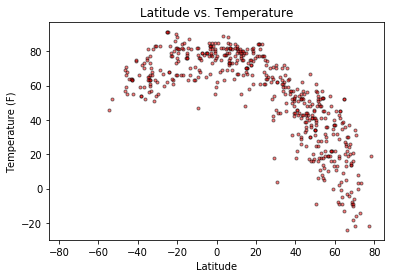

In [7]:
#Build scatterplot latitude vs. Temperature
plt.scatter(Lat_list, Temp_list, marker=".", facecolors="red", edgecolors="black", alpha =0.5)
x_max = Lat_list.max() + 10
x_min = Lat_list.min() - 10

# The limits on latitude
plt.xlim(-85, 85)

# Set up axis'
x_axis = np.arange(x_min, x_max, 50)
y_axis = np.arange(0, 100, 20)

# Create a title, x label, and y label for scatterplot
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

#Display and save the scatterplot
plt.savefig("Lat_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

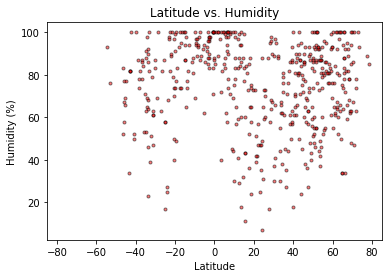

In [8]:
#Build scatterplot latitude vs. Humidity
plt.scatter(Lat_list, Humid_list, marker=".", facecolors="red", edgecolors="black", alpha =0.5)
x_max = Lat_list.max() + 10
x_min = Lat_list.min() - 10

# The limits on latitude
plt.xlim(-85, 85)

# Set up axis'
x_axis = np.arange(x_min, x_max, 50)

# Create a title, x label, and y label for scatterplot
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Display and save the scatterplot
plt.savefig("Lat_Humid.png")
plt.show()

#### Latitude vs. Cloudiness Plot

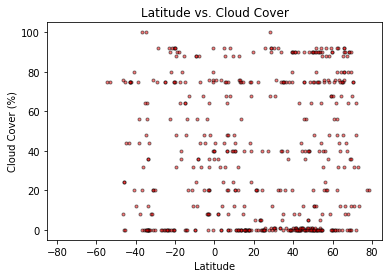

In [9]:
#Build scatterplot latitude vs. cloud cover
plt.scatter(Lat_list, Cloud_list, marker=".", facecolors="red", edgecolors="black", alpha =0.5)
x_max = Lat_list.max() + 10
x_min = Lat_list.min() - 10

# The limits on latitude
plt.xlim(-85, 85)

# Set up axis'
x_axis = np.arange(x_min, x_max, 50)

# Create a title, x label, and y label for scatterplot
plt.title("Latitude vs. Cloud Cover")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover (%)")

#Display and save the scatterplot
plt.savefig("Lat_Cloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

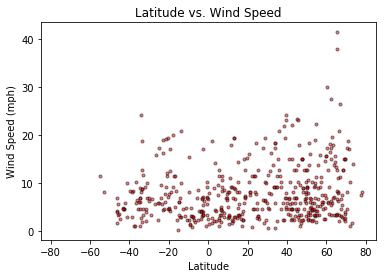

In [10]:
#Build scatterplot for latitude vs. Wind speed
plt.scatter(Lat_list, Wind_list, marker=".", facecolors="red", edgecolors="black", alpha =0.5)
x_max = Lat_list.max() + 10
x_min = Lat_list.min() - 10

# The limits on latitude
plt.xlim(-85, 85)

# Set up axis'
x_axis = np.arange(x_min, x_max, 50)

# Create a title, x label, and y label for scatterplot
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#Display and save the scatterplot
plt.savefig("Lat_Wind.png")
plt.show()